# WeRateDogs Analysis Project

The purpose of this project is to scrape, clean and analyze tweets from the WeRateDogs twitter account.

In [11]:
"""Setting up the environment"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import io
import tweepy
import json

## Gather

### Loading twitter archives

The WeRateDogs Twitter archive is provided in form of a csv-file and loaded from the file system. The name of the file is `twitter-archive-enhanced.csv`.

In [14]:
tweets = pd.read_csv('twitter-archive-enhanced.csv')
tweets.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [15]:
tweets.shape

(2356, 17)

### Loading image predictions from the web

The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. The file (`image_predictions.tsv`) is hosted on Udacity's servers and is downloaded programmatically using the Requests library. The file contains the top three dog predictions based on a image, as well as the containing tweet.

In [16]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
content = response.content
predictions = pd.read_csv(io.StringIO(content.decode('utf-8')), sep="\t")
predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [17]:
predictions.shape

(2075, 12)

### Load tweet metadata from Twitter

To load extensive metadata for each tweet, we use the TweePy API. As Twitter limits use of their API by 100 API calls per hour, we initialize the Twitter API with the `wait_on_rate_limit` and `wait_on_rate_limit_notify` parameter set. Thereby Tweepy will sleep for the rate limit to replenish once we have reached the rate limit. It will also print out a message. Not setting these parameters and repeatedly exceeding the rate limit might cause the account to be blocked.

In [23]:
"""Connecting to the TweePy API"""

"""TODO: Remove Key Secret"""
api_key = "a3ErriWDYrXoKPORmVLXUgHc4"
api_secret = "9zjvmCwpwyfGVNLnrOsxeG4qIAMvVCfckFTVoolH88soThd6nS"

auth = tweepy.OAuthHandler(api_key, api_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

Extended tweet content can be accessed via the function `get_status(tweet-id)`. We use it on all available tweets from the column `tweets.tweet_id` and story the retreived json entirely in a separate file.

In [21]:
"""Example for a response from the tweepy get_status function"""
r = api.get_status("666020888022790149")
r._json

{'created_at': 'Sun Nov 15 22:32:08 +0000 2015',
 'id': 666020888022790149,
 'id_str': '666020888022790149',
 'text': 'Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj',
 'truncated': False,
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 666020881337073664,
    'id_str': '666020881337073664',
    'indices': [108, 131],
    'media_url': 'http://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg',
    'url': 'https://t.co/BLDqew2Ijj',
    'display_url': 'pic.twitter.com/BLDqew2Ijj',
    'expanded_url': 'https://twitter.com/dog_rates/status/666020888022790149/photo/1',
    'type': 'photo',
    'sizes': {'medium': {'w': 960, 'h': 720, 'resize': 'fit'},
     'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'large': {'w': 960, 'h': 720, 'resize': 'fit'},
     'small': {'w': 680, 'h': 510,

We now call the API method to retreive extended tweet metadata and write the obtained json to file `tweet_json.txt`. For this purpose, the obtained json neets to be converted to a writable JSON-string. This can be one by creating a JSON dump via the `json` library. Furthermore we need to ensure that the request is OK and tweet data is retreived. 

When a TweepError is raised due to an error Twitter responded with, the error code (as described in the API documentation) can be accessed at `TweepError.response.text`. Note, however, that TweepErrors also may be raised with other things as message (for example plain error reason strings).


In [101]:
"""Retreive extended tweet metadata and write obtained json to file. It case of an error, write the 
error message to a separate file."""
error_ids = []
with open("tweet_json.txt", 'a') as outfile, open("twitter_errors.txt", 'a') as errorfile:
    for id in tweets.tweet_id:
        try:
            tweet = api.get_status(id)
            outfile.write(json.dumps(tweet._json))
            outfile.write('\n')
        except tweepy.TweepError as error:
            error_ids.append(id)
            errorfile.write(error.response.text)
            errorfile.write('\n')
            pass

We then read the file line-by-line and write the obtained json into a Pandas Dataframe. As the json contains multilevel data, we flatten the json using Pandas' `pd.json_normalize`. We then restrict the dataframe to relevant columns.

In [141]:
"""Reading tweet_json.txt line-by-line and write tweet data into dataframe"""
tweets_extended = pd.DataFrame()
with open("tweet_json.txt", 'r', encoding="utf-8") as infile:
    for line in infile:
        obj = json.loads(line)
        df = pd.json_normalize(obj)[['id','text','retweeted','retweet_count','favorite_count','created_at']]
        tweets_extended = tweets_extended.append(df)

Let us have a look at the obtained data.

In [103]:
"""Print tweets_extended"""
tweets_extended.head()

,id,retweeted,retweet_count,favorite_count,created_at
0,892420643555336193,False,7232,34655,Tue Aug 01 16:23:56 +0000 2017
0,892177421306343426,False,5419,30035,Tue Aug 01 00:17:27 +0000 2017
0,891815181378084864,False,3578,22605,Mon Jul 31 00:18:03 +0000 2017
0,891689557279858688,False,7443,37925,Sun Jul 30 15:58:51 +0000 2017
0,891327558926688256,False,7988,36197,Sat Jul 29 16:00:24 +0000 2017


In [105]:
tweets_extended.shape

(2328, 5)

## Assess

In [128]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

<AxesSubplot:>

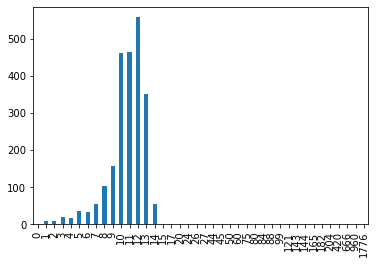

In [115]:
tweets.rating_numerator.value_counts().sort_index().plot.bar()

<AxesSubplot:>

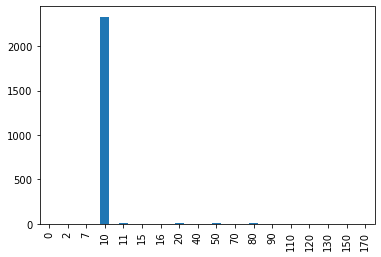

In [117]:
tweets.rating_denominator.value_counts().sort_index().plot.bar()

In [155]:
tweets.query('rating_denominator != 10')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [156]:
tweets.name.value_counts()

None        745
a            55
Charlie      12
Cooper       11
Oliver       11
           ... 
Dunkin        1
Kingsley      1
Maude         1
Spanky        1
Jo            1
Name: name, Length: 957, dtype: int64

0    This is Phineas. He's a mystical boy. Only eve...
0    This is Tilly. She's just checking pup on you....
0    This is Archie. He is a rare Norwegian Pouncin...
0    This is Darla. She commenced a snooze mid meal...
0    This is Franklin. He would like you to stop ca...
                           ...                        
0    Here we have a 1949 1st generation vulpix. Enj...
0    This is a purebred Piers Morgan. Loves to Netf...
0    Here is a very happy pup. Big fan of well-main...
0    This is a western brown Mitsubishi terrier. Up...
0    Here we have a Japanese Irish Setter. Lost eye...
Name: text, Length: 2328, dtype: object

In [163]:
predictions.query('p1_conf < 0.1')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
38,666644823164719104,https://pbs.twimg.com/media/CUBl6IwVAAA9_zT.jpg,1,Ibizan_hound,0.044333,True,Pembroke,0.043209,True,West_Highland_white_terrier,0.038906,True
109,667885044254572545,https://pbs.twimg.com/media/CUTN5V4XAAAIa4R.jpg,1,malamute,0.088530,True,golden_retriever,0.087499,True,muzzle,0.075008,False
136,668507509523615744,https://pbs.twimg.com/media/CUcECBYWcAAzFRg.jpg,1,basenji,0.055379,True,Shetland_sheepdog,0.054322,True,whippet,0.051913,True
145,668625577880875008,https://pbs.twimg.com/media/CUdvambWoAA007z.jpg,1,ox,0.071536,False,groenendael,0.054455,True,Angora,0.045028,False
246,670474236058800128,https://pbs.twimg.com/media/CU4AwqQWUAAEgE2.jpg,1,wool,0.070076,False,siamang,0.062536,False,gorilla,0.058894,False
250,670691627984359425,https://pbs.twimg.com/media/CU7GehOUYAA9nn-.jpg,1,Shetland_sheepdog,0.071124,True,home_theater,0.068398,False,American_Staffordshire_terrier,0.066964,True
277,670842764863651840,https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg,1,microphone,0.096063,False,accordion,0.094075,False,drumstick,0.061113,False
301,671497587707535361,https://pbs.twimg.com/media/CVGjflNWoAEwgrQ.jpg,1,swing,0.089165,False,paddle,0.080747,False,bathing_cap,0.065694,False
515,676263575653122048,https://pbs.twimg.com/media/CWKSIfUUYAAiOBO.jpg,1,teddy,0.098283,False,toy_poodle,0.098029,True,shopping_basket,0.077852,False


## Quality
- numerator and denominator are not all base 10
- tweets: wrong numerator/denominator for id=66628740622469529 and id=835246439529840640 and id=740373189193256964

## Structure
- Datatypes (tbd)
- set indices
- tweets

## Clean

We do not want to perform cleaning steps on the original data, in case we want to roll back. Therefore let's first create copies of the original dataframes before starting cleaning.

In [104]:
"""Copy dataframes"""
tweets_clean = tweets.copy()
predictions_clean = predictions.copy()
tweets_extended_clean = tweets_extended.copy()

#### Define

#### Code

#### Test